# Loading Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df =  pd.read_csv('/content/drive/MyDrive/AI_Research/spam.csv',encoding="ISO-8859-1")

In [3]:
df = df[['v1','v2']]

In [4]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Preprocessing

In [5]:
# Setting Column names
df.rename(columns = {'v1':'Category', 'v2':'Message'}, inplace = True)
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
# Label Encoding 
df['spam']=df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Message'],df['spam'], stratify=df['spam'])
X_train.head(4)

3148               Sorry,  in meeting I'll call you later
2806    December only! Had your mobile 11mths+? You ar...
2718    18 days to Euro2004 kickoff! U will be kept in...
2542                         Aiyo please Ì_ got time meh.
Name: Message, dtype: object

# Creating the Model

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
!pip install tensorflow-text
import tensorflow_text as text

In [18]:
# Getting BERT Preprocessing and Embedding layers
bert_preprocess = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3')
bert_encoder = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4')

In [22]:
bert_preprocess(['Hello my friend friend'])

{'input_word_ids': <tf.Tensor: shape=(1, 128), dtype=int32, numpy=
 array([[ 101, 7592, 2026, 2767, 2767,  102,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0]], dtype=int32)>,
 'input_mask': <tf.Tensor: shape=(1, 128

In [10]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)
# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)
# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [11]:
# Compile
model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

In [12]:
# Fit the Model
history_1 = model.fit(X_train,
                      y_train,
                      epochs = 10,
                      batch_size=32)

Epoch 1/10
131/131 [==============================] - 64s 317ms/step - loss: 0.3258 - accuracy: 0.8653
Epoch 2/10
131/131 [==============================] - 44s 336ms/step - loss: 0.2335 - accuracy: 0.8947
Epoch 3/10
131/131 [==============================] - 47s 358ms/step - loss: 0.1933 - accuracy: 0.9244
Epoch 4/10
131/131 [==============================] - 46s 352ms/step - loss: 0.1707 - accuracy: 0.9332
Epoch 5/10
131/131 [==============================] - 47s 357ms/step - loss: 0.1559 - accuracy: 0.9462
Epoch 6/10
131/131 [==============================] - 46s 352ms/step - loss: 0.1425 - accuracy: 0.9529
Epoch 7/10
131/131 [==============================] - 47s 356ms/step - loss: 0.1362 - accuracy: 0.9567
Epoch 8/10
131/131 [==============================] - 46s 354ms/step - loss: 0.1248 - accuracy: 0.9624
Epoch 9/10
131/131 [==============================] - 47s 356ms/step - loss: 0.1166 - accuracy: 0.9646
Epoch 10/10
131/131 [==============================] - 46s 352ms/step - l

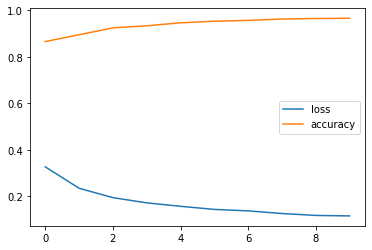

In [14]:
pd.DataFrame(history_1.history).plot();

In [20]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()
print(y_predicted)

44/44 [==============================] - 17s 374ms/step
[0.6771921  0.00424548 0.10136134 ... 0.00432865 0.80539906 0.00534193]
